# SIM Patter

### The Python version

Below is the Mathematica code for reference.

```mathematica

patterntabArb[vecA_, period_, onfrac_, phaseInd_, phaseOffset_: 0., 
  nphases_: 5, sizex_: 1280, sizey_: 1024] := Block[
  {veckA = {1., -1.} Reverse[vecA], vecB, area, onpix, phaseStep},
  
  vecB = veckA/Norm[vecA]*period; area = vecB.veckA; 
  onpix = area * onfrac; phaseStep = vecB/nphases;
  
  Table[If[
    Mod[({x, 
          y} - (phaseStep*phaseInd + 
           phaseOffset/(2. \[Pi])*vecB)).veckA, area] >= onpix, 0., 
    1.], {y, 0, sizey - 1}, {x, 0, sizex - 1}]
  ]

```

In [1]:
%pylab inline
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
def patterntabArb(vecA, period, onfrac, phaseInd, phaseOffset = 0., nphases =5, sizex =1280, sizey =1024):
    veckA = array([[0,1],[-1,0]]).dot(vecA)
    vecB = veckA/norm(vecA)*period
    area = vecB.dot(veckA)
    onpix = area*onfrac
    phaseStep = vecB/nphases
    
    toReturn = zeros((sizex,sizey))
    
    val = (phaseStep*phaseInd+phaseOffset/(2*pi)*vecB)
    
    return array([[mod((array([i,j])-val).dot(veckA),area) < onpix for i in range(1,11)] for j in range(1,11)])
    
    #for i in range(sizex):
    #    for j in range(sizey):
    #        if mod((array([i,j])-val).dot(veckA),area) < onpix:
    #            toReturn[i,j] = 1
    #        else:
    #            toReturn[i,j] = 0
    #        
    #return toReturn

In [3]:
def patterntabArb_Time(vecA, period, onfrac, phaseInd, phaseOffset = 0., nphases =5, sizex =1280, sizey =1024):
    
    start = time.time()
    veckA = array([[0,1],[-1,0]]).dot(vecA)
    print('veckA =',veckA)
    print('veckA took ',time.time()-start,'to calculate')
    
    start = time.time()
    vecB = veckA/norm(vecA)*period
    print('veckB took ',time.time()-start,'to calculate')
    
    start = time.time()
    area = vecB.dot(veckA)
    print('area =',area)
    print('area took ',time.time()-start,'to calculate')
    
    start = time.time()
    onpix = area*onfrac
    print('onpix took ',time.time()-start,'to calculate')
    
    start = time.time()
    phaseStep = vecB/nphases
    print('phaseStep took ',time.time()-start,'to calculate')
    
    start = time.time()
    toReturn = zeros((sizex,sizey))
    print('toReturn took ',time.time()-start,'to calculate')
    
    start = time.time()
    val = (phaseStep*phaseInd+phaseOffset/(2*pi)*vecB)
    print('val =',val)
    print('val took ',time.time()-start,'to calculate')
    
    myTimes = zeros(sizex*sizey)
    
    for i in range(sizex):
        for j in range(sizey):
            start = time.time()
            if mod((array([i,j])-val).dot(veckA),area) < onpix:
                toReturn[i,j] = 1
            else:
                toReturn[i,j] = 0
            myTimes[i+j]=time.time()-start
            
    print('On average it took',mean(myTimes),'to calculate mod')

In [4]:
#@autojit
def patterntabArb2(vecA, period, onfrac, phaseInd, phaseOffset = 0., nphases =5, sizex = 2048, sizey = 1536):
    veckA = array([[0,1],[-1,0]]).dot(vecA)
    vecB = veckA/norm(vecA)*period
    area = vecB.dot(veckA)
    onpix = area*onfrac
    phaseStep = vecB/nphases
    
    toReturn = zeros((sizex,sizey))
    
    val = (phaseStep*phaseInd+phaseOffset/(2*pi)*vecB)
    
    return array([[mod((array([i,j])-val).dot(veckA),area) < onpix for j in range(sizey)] for i in range(sizex)])

def patterntabArb3(vecA, period, onfrac, phaseInd, phaseOffset = 0., nphases =5, sizex =2048, sizey =1536):
    veckA = array([[0,1],[-1,0]]).dot(vecA)
    vecB = veckA/norm(vecA)*period
    area = vecB.dot(veckA)
    onpix = area*onfrac
    phaseStep = vecB/nphases
    
    val = (phaseStep*phaseInd+phaseOffset/(2*pi)*vecB)
    
    xx, yy = meshgrid(arange(sizex),arange(sizey))
    my_grid = dstack((yy,xx))
    
    
    return mod((my_grid-val).dot(veckA),area) < onpix

In [5]:
test = patterntabArb(array([12, -1]), 4.8277, 0.5, 0, 0., 3, 64, 64)
test2 = patterntabArb2(array([12, -1]), 4.8277, 0.5, 0, 0., 3, 64, 64)
test3 = patterntabArb3(array([12, -1]), 4.8277, 0.5, 0, 0., 3, 64, 64)

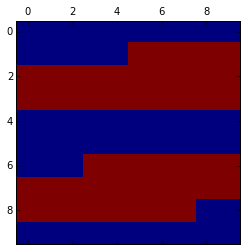

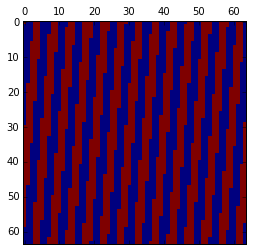

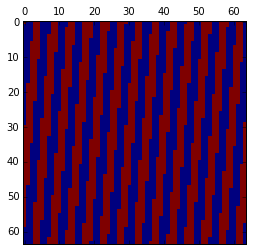

In [6]:
matshow(test)
matshow(test2)
matshow(test3)

In [7]:
#%timeit patterntabArb(array([12, -1]), 4.8277, 0.5, 0, 0., 3, 128, 128)
#%timeit patterntabArb2(array([12, -1]), 4.8277, 0.5, 0, 0., 3)
%timeit patterntabArb3(array([12, -1]), 4.8277, 0.5, 0, 0., 3)

1 loops, best of 3: 611 ms per loop


In [84]:
%timeit patterntabArb_Time(array([12, -1]), 4.8277, 0.5, 0, 0., 3, 256, 256)

veckA = [ -1 -12]
veckA took  0.0008869171142578125 to calculate
veckB took  9.202957153320312e-05 to calculate
area = 58.133206148
area took  5.91278076171875e-05 to calculate
onpix took  1.1920928955078125e-06 to calculate
phaseStep took  1.0013580322265625e-05 to calculate
toReturn took  0.00011897087097167969 to calculate
val = [-0. -0.]
val took  0.0006530284881591797 to calculate
On average it took 2.14276951738e-07 to calculate mod
veckA = [ -1 -12]
veckA took  0.04256892204284668 to calculate
veckB took  6.29425048828125e-05 to calculate
area = 58.133206148
area took  4.696846008300781e-05 to calculate
onpix took  1.9073486328125e-06 to calculate
phaseStep took  1.0013580322265625e-05 to calculate
toReturn took  0.0002810955047607422 to calculate
val = [-0. -0.]
val took  0.0005881786346435547 to calculate
On average it took 2.2613312467e-07 to calculate mod
veckA = [ -1 -12]
veckA took  0.001043081283569336 to calculate
veckB took  6.413459777832031e-05 to calculate
area = 58.

In [15]:
test =[[mod(i,j) for i in range(1,11)] for j in range(1,11)]
print(test)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0], [1, 2, 0, 1, 2, 0, 1, 2, 0, 1], [1, 2, 3, 0, 1, 2, 3, 0, 1, 2], [1, 2, 3, 4, 0, 1, 2, 3, 4, 0], [1, 2, 3, 4, 5, 0, 1, 2, 3, 4], [1, 2, 3, 4, 5, 6, 0, 1, 2, 3], [1, 2, 3, 4, 5, 6, 7, 0, 1, 2], [1, 2, 3, 4, 5, 6, 7, 8, 0, 1], [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]]
